## 1.1: Загрузка библиотек и данных

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
%matplotlib inline

In [33]:
df = pd.read_csv('Churn_Modelling (2).csv', sep=';')

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой признак:
- Exited – факт ухода клиента

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 1.2: Подготовка признаков (X) и целевой переменной (y)

In [36]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [37]:
# Определяем признаки (X) и целевую переменную (y)
X = df.drop('Exited', axis=1) # о клиенте
y = df['Exited']             # ответ(ушел или остался)

## 1.3: Обработка категориальных признаков (One-Hot Encoding)

In [38]:
# Преобразование категориальных признаков 'Geography' и 'Gender' , тк модели не работают с текстовыми данными
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## 1.4: Разделение и масштабирование данных

1. Разделение на обучающую и тестовую выборки (80% на обучение, 20% на тест)
random_state обеспечивает воспроизводимость результата

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y #-- сохраняет соотношение классов Exited
)

2. Масштабирование числовых признаков

In [40]:
# Инициализируем масштабировщик
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)# Обучаем scaler на обучающих данных и применяем
X_test_scaled = scaler.transform(X_test)# Применяем к тестовым данным

# Преобразуем обратно в DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 2.1: Обучение моделей

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [42]:
# Инициализация моделей
model_lr = LogisticRegression(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier()

In [43]:
# Обучение Логистической регрессии
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [44]:
# Обучение Случайного леса
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Обучение K-ближайших соседей
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [46]:
# Получение предсказаний на тестовой выборке
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_knn = model_knn.predict(X_test_scaled)

## 2.2: Оценка и сравнение моделей

Сравним модели по метрике F1-мера, которая более информативна для несбалансированных данных, чем просто точность (Accuracy).

In [47]:
# Логистическая регрессия
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Случайный лес
f1_rf = f1_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

# K-ближайшие соседи
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)


In [48]:
print("\nЛогистическая регрессия:")
print(f"  F1-мера: {f1_lr:.4f}")
print(f"  Точность (Accuracy): {acc_lr:.4f}")


Логистическая регрессия:
  F1-мера: 0.2836
  Точность (Accuracy): 0.8080


In [49]:
print("\nСлучайный лес:")
print(f"  F1-мера: {f1_rf:.4f}")
print(f"  Точность (Accuracy): {acc_rf:.4f}")


Случайный лес:
  F1-мера: 0.5789
  Точность (Accuracy): 0.8640


In [50]:
print("\nK-ближайшие соседи:")
print(f"  F1-мера: {f1_knn:.4f}")
print(f"  Точность (Accuracy): {acc_knn:.4f}")


K-ближайшие соседи:
  F1-мера: 0.4430
  Точность (Accuracy): 0.8240


In [51]:
models = {
    'Логистическая регрессия': f1_lr,
    'Случайный лес': f1_rf,
    'K-ближайшие соседи': f1_knn
    
}

best_model_name = max(models, key=models.get)
best_model_f1 = models[best_model_name]

print(f"\nЛучшая модель: \n{best_model_name} (F1-мера: {best_model_f1:.4f})")


Лучшая модель: 
Случайный лес (F1-мера: 0.5789)


In [52]:
print("\n Отчет о классификации для лучшей модели (Случайный лес)")
print(classification_report(y_test, y_pred_rf))


 Отчет о классификации для лучшей модели (Случайный лес)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



Вывод: лучшая модель - Случайный лес.
У него самая высокая F1-мера.
Случайный лес лучше справился с задачей (F1 = 0.58), чем Логистическая регрессия (F1 = 0.28) и K-ближайшие соседи (F1 =  0.44). 

## Визуализация сравнения моделей

In [53]:
results = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Случайный лес', 'K-ближайшие соседи'],
    'F1-мера': [f1_lr, f1_rf, f1_knn],
    'Точность': [acc_lr, acc_rf, acc_knn]
})

C:\Users\polin\AppData\Local\Temp\ipykernel_2392\1777452813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-мера', y='Модель', data=results.sort_values('F1-мера'), palette='pastel')


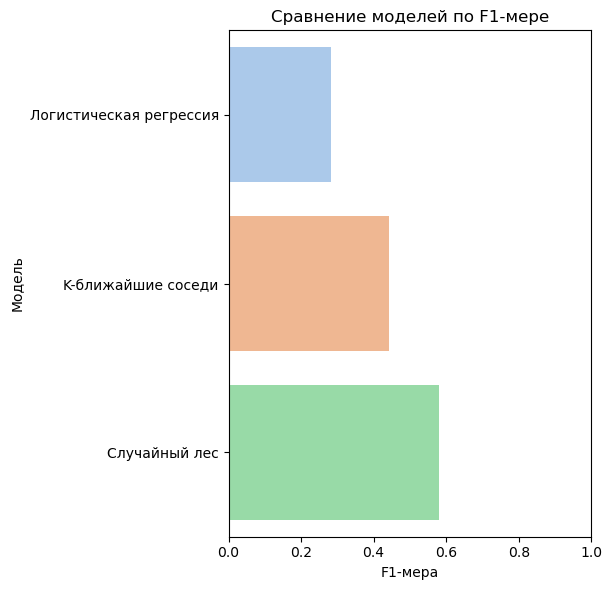

In [54]:
# Визуализация F1-меры
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='F1-мера', y='Модель', data=results.sort_values('F1-мера'), palette='pastel')
plt.title('Сравнение моделей по F1-мере')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\polin\AppData\Local\Temp\ipykernel_2392\1582631149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Точность', y='Модель', data=results.sort_values('Точность'), palette='pastel')


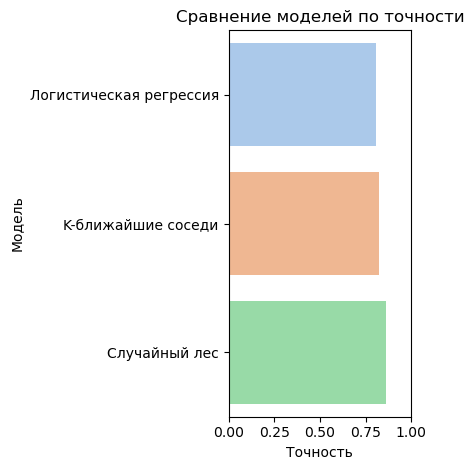

In [55]:
# Визуализация точности
plt.subplot(1, 2, 2)
sns.barplot(x='Точность', y='Модель', data=results.sort_values('Точность'), palette='pastel')
plt.title('Сравнение моделей по точности')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()



Вывод: Случайный лес лучше всего подходит для задачи прогнозирования оттока клиентов банка.Oн эффективно работает с нелинейными зависимостями и несбалансированными данными.

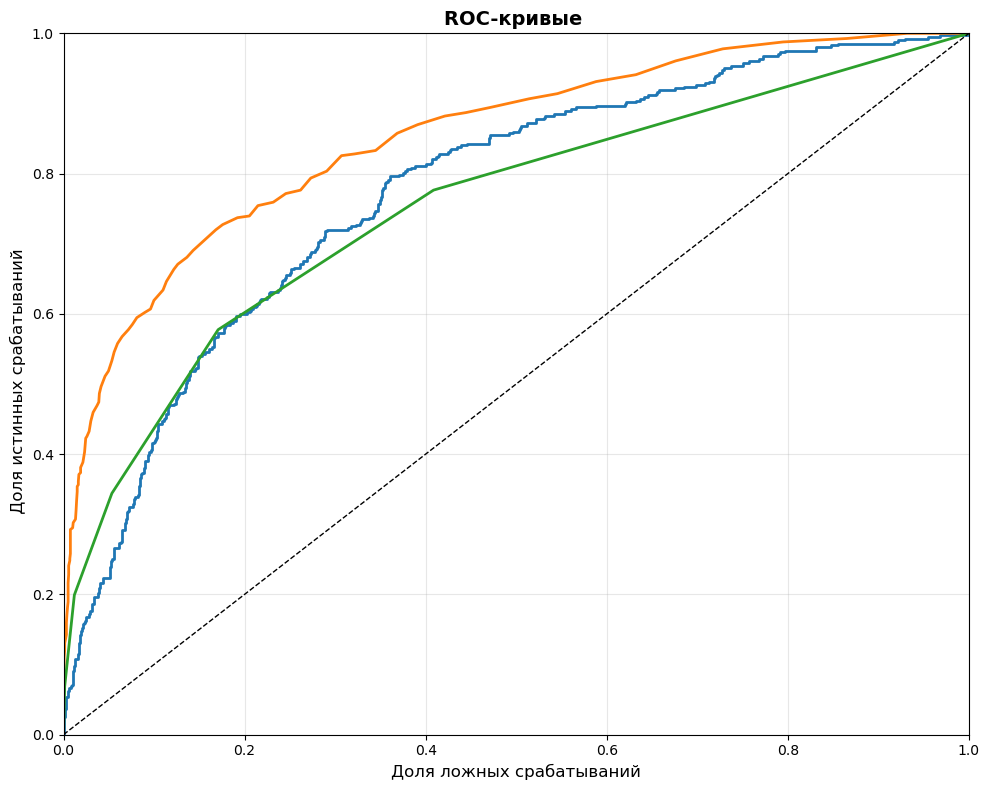

In [65]:
y_pred_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1] 
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
# Вычисляем ROC-кривые
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

# Вычисляем AUC (Area Under Curve)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Логистическая регрессия (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Случайный лес (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'K-ближайших соседей (AUC = {auc_knn:.3f})', linewidth=2)

# Диагональная линия 
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

# Настройки графика
plt.xlabel('Доля ложных срабатываний', fontsize=12)
plt.ylabel(' Доля истинных срабатываний', fontsize=12)
plt.title('ROC-кривые ', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.tight_layout()
plt.show()